In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing necessary libraries**

In [ ]:
!pip install pennylane-qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 124.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 100.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 117.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install qiskit-aer

In [ ]:
!pip install qiskit

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import pennylane as qml
import random
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from qiskit import QuantumCircuit,Aer

**Dataset import**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/master thesis/stk.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-11-10,34200.0,39000.0,33816.0,37248.0,37248.0,1800
1,2006-11-13,37632.0,39840.0,37632.0,38376.0,38376.0,300
2,2006-11-14,39096.0,39096.0,35520.0,36600.0,36600.0,100
3,2006-11-15,36936.0,38400.0,36000.0,38400.0,38400.0,100
4,2006-11-16,38664.0,44688.0,38640.0,43800.0,43800.0,100


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3369.000000,3369.000000,3369.000000,3369.000000,3369.000000,3.369000e+03
mean,12508.947783,12903.728923,12092.930579,12478.765334,12478.765334,1.123126e+04
std,16281.885410,16759.659768,15771.851004,16244.328576,16244.328576,1.469649e+05
min,3.650000,3.950000,3.500000,3.770000,3.770000,0.000000e+00
25%,180.000000,192.000000,166.000000,180.000000,180.000000,0.000000e+00
50%,3408.000000,3552.000000,3312.000000,3408.000000,3408.000000,1.000000e+02
75%,23688.000000,24552.000000,22920.000000,23688.000000,23688.000000,2.000000e+02
max,68328.000000,71424.000000,67200.000000,69336.000000,69336.000000,6.384300e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3369 entries, 0 to 3368
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3369 non-null   object 
 1   Open       3369 non-null   float64
 2   High       3369 non-null   float64
 3   Low        3369 non-null   float64
 4   Close      3369 non-null   float64
 5   Adj Close  3369 non-null   float64
 6   Volume     3369 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 184.4+ KB


In [ ]:
df.fillna(method='ffill')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-11-10,34200.00,39000.00,33816.00,37248.00,37248.00,1800
1,2006-11-13,37632.00,39840.00,37632.00,38376.00,38376.00,300
2,2006-11-14,39096.00,39096.00,35520.00,36600.00,36600.00,100
3,2006-11-15,36936.00,38400.00,36000.00,38400.00,38400.00,100
4,2006-11-16,38664.00,44688.00,38640.00,43800.00,43800.00,100
...,...,...,...,...,...,...,...
3364,2020-03-26,3.88,4.43,3.75,4.21,4.21,160300
3365,2020-03-27,4.09,4.17,3.86,4.07,4.07,40000
3366,2020-03-30,3.93,4.11,3.70,3.85,3.85,66200
3367,2020-03-31,3.83,3.95,3.65,3.77,3.77,38600


In [ ]:
date=df['Date'].values

**Data Scaling**

In [ ]:
df = df.drop(columns=['Date'])

In [ ]:
scaler = MinMaxScaler()
df.iloc[:,0:] = scaler.fit_transform(df.iloc[:,0:])
df.iloc[:,0:]

,Open,High,Low,Close,Adj Close,Volume
0,0.500500,0.546010,0.503188,0.537185,0.537185,0.000282
1,0.550731,0.557771,0.559977,0.553454,0.553454,0.000047
2,0.572158,0.547354,0.528547,0.527839,0.527839,0.000016
3,0.540544,0.537609,0.535690,0.553801,0.553801,0.000016
4,0.565836,0.625651,0.574978,0.631686,0.631686,0.000016
...,...,...,...,...,...,...
3364,0.000003,0.000007,0.000004,0.000006,0.000006,0.025108
3365,0.000006,0.000003,0.000005,0.000004,0.000004,0.006265
3366,0.000004,0.000002,0.000003,0.000001,0.000001,0.010369
3367,0.000003,0.000000,0.000002,0.000000,0.000000,0.006046


**Feature Selection**

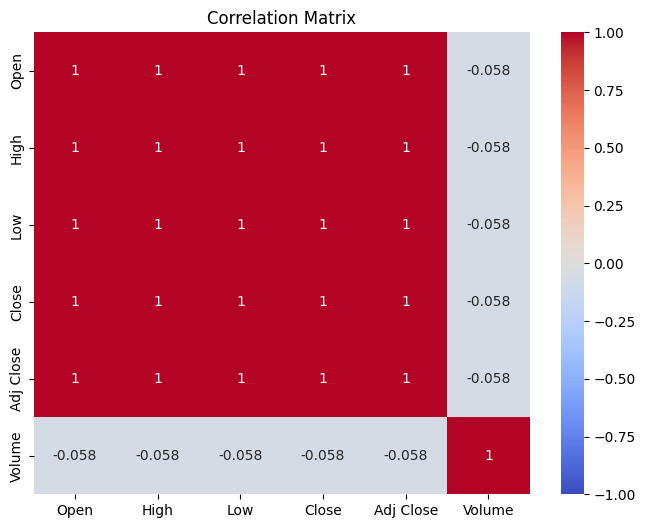

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Relative Strength Index (RSI)**

In [ ]:
df['MA_20'] = df['Adj Close'].rolling(window=20).mean()
df['MA_50'] = df['Adj Close'].rolling(window=50).mean()

In [ ]:
def calculate_rsi(data, column='Adj Close', window=14):
    delta = data[column].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

df['RSI'] = calculate_rsi(df)

df['RSI']

0              NaN
1       100.000000
2        38.842975
3        62.244898
4        82.422803
           ...    
3364     37.689971
3365     43.205578
3366     34.831464
3367     38.993711
3368     50.225225
Name: RSI, Length: 3369, dtype: float64

In [ ]:
X = df[['Open', 'High', 'Low']].values
X

array([[5.00500188e-01, 5.46009839e-01, 5.03188410e-01],
       [5.50731181e-01, 5.57771242e-01, 5.59977082e-01],
       [5.72158389e-01, 5.47353999e-01, 5.28546874e-01],
       ...,
       [4.09809931e-06, 2.24026847e-06, 2.97634620e-06],
       [2.63449017e-06, 0.00000000e+00, 2.23226054e-06],
       [1.46360565e-06, 7.56089814e-06, 3.72043187e-06]])

In [ ]:
y = df['Adj Close'].values
y

array([5.37184943e-01, 5.53454432e-01, 5.27838640e-01, ...,
       1.15386342e-06, 0.00000000e+00, 5.33662174e-06])

**Data splitting**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(2695, 3)

In [ ]:
y_train.shape

(2695,)

**Quantum encoding**

In [ ]:
@qml.qnode(qml.device("default.qubit", wires=3))
def quantum_circuit(params, x):

  for i in range(3):
      random_params = [random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi)]
      qml.Rot(*random_params, wires=i)


  return [qml.expval(qml.PauliZ(i)) for i in range(3)]


**Establishing quantum circuit**

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.visualization import circuit_drawer

num_features = x_train.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#feature_map.decompose().draw(output=MatplotlibDrawer(), fold=20)
print(feature_map.decompose())

     ┌───┐┌─────────────┐                                               »
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     └───┘└─────────────┘                                          └───┘»
«                                               »
«q_0: ──────────────────────────────────■───────»
«                                       │       »
«q_1: ──────────────────────────────────┼────■──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐»
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├»
«     └──────────────────────────────┘└───┘└───┘»
«                                          
«q_0: ─────────────────────────────────────
«                                          


In [ ]:
Nfrom qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
print(ansatz.decompose())

     ┌──────────┐                 ┌──────────┐                 ┌──────────┐»
q_0: ┤ Ry(θ[0]) ├──────────■──────┤ Ry(θ[3]) ├──────────■──────┤ Ry(θ[6]) ├»
     ├──────────┤        ┌─┴─┐    ├──────────┤        ┌─┴─┐    ├──────────┤»
q_1: ┤ Ry(θ[1]) ├──■─────┤ X ├────┤ Ry(θ[4]) ├──■─────┤ X ├────┤ Ry(θ[7]) ├»
     ├──────────┤┌─┴─┐┌──┴───┴───┐└──────────┘┌─┴─┐┌──┴───┴───┐└──────────┘»
q_2: ┤ Ry(θ[2]) ├┤ X ├┤ Ry(θ[5]) ├────────────┤ X ├┤ Ry(θ[8]) ├────────────»
     └──────────┘└───┘└──────────┘            └───┘└──────────┘            »
«                        ┌──────────┐
«q_0: ───────────■───────┤ Ry(θ[9]) ├
«              ┌─┴─┐    ┌┴──────────┤
«q_1: ──■──────┤ X ├────┤ Ry(θ[10]) ├
«     ┌─┴─┐┌───┴───┴───┐└───────────┘
«q_2: ┤ X ├┤ Ry(θ[11]) ├─────────────
«     └───┘└───────────┘             


**Bloch sphere**

Bloch Vector for the First Data Point:
Statevector([0.96414537+0.j, 0.26537464+0.j],
            dims=(2,))


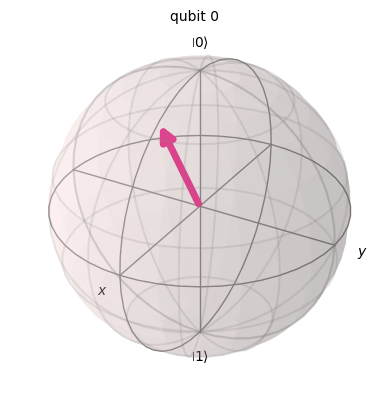

In [ ]:
from qiskit.visualization import plot_bloch_multivector
from IPython.display import display
data_to_encode = df['Adj Close'].values

def encode_data_as_bloch(data):
    bloch_vectors = []
    for value in data:
        qc = QuantumCircuit(1)
        qc.ry(value, 0)
        simulator = Aer.get_backend('statevector_simulator')
        result = simulator.run(qc).result()
        bloch_vector = result.get_statevector(qc)
        bloch_vectors.append(bloch_vector)
    return bloch_vectors

bloch_vectors = encode_data_as_bloch(data_to_encode)

if bloch_vectors:
    bloch_vector = bloch_vectors[0]
    print("Bloch Vector for the First Data Point:")
    print(bloch_vector)
    plot_bloch_multivector(bloch_vector).show()
display(plot_bloch_multivector(bloch_vector))
plot = plot_bloch_multivector(bloch_vector)

**Training**

In [ ]:
def quantum_model(params, x):
    measurement_results = quantum_circuit(params, x)
    return measurement_results

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

def train_model(x_train, y_train, x_test):
    num_samples, num_features = x_train.shape
    num_params = 3

    # Initializing PennyLane optimizer
    opt = qml.GradientDescentOptimizer(stepsize=0.4)

    def cost_function(params):
        total_cost = 0

        for i in range(num_samples):
            x_sample = x_train[i:i+1]
            prediction = quantum_model(params, x_sample)

            tensor_array = np.array([abs(t.item()) for t in prediction])
            predictions = tensor_array.reshape(-1, 1)

            values = y_train[i:i+1]
            values = np.repeat(values, 3)

            model.fit(predictions, values)

            # Calculating liklihood of observed data
            likelihood = np.exp(-0.5 * np.sum((values - predictions) ** 2))

            total_cost += np.log(likelihood)

        return -total_cost / num_samples

    params = np.random.uniform(low=-np.pi / 2, high=np.pi / 2, size=(num_features, num_params))

    for step in range(1):
        params = opt.step(cost_function, params)

    return 0


**Performance metrics**

In [ ]:
import numpy as np

def mean_squared_errors(predictions, targets):

    if predictions.shape != targets.shape:

        raise ValueError("Shapes of predictions and targets must match.")

    mse = np.mean((predictions - targets)**2)
    return mse


In [ ]:
def r2_scores(y_test,y_pred):
    mean_y = np.mean(y_test)
    ssr = np.sum((y_test - y_pred) ** 2)

    # SST calculation
    sst = np.sum((y_test - mean_y) ** 2)

    # R-square calculation
    r_squared = abs(1 - (ssr / sst))
    return r_squared

In [ ]:
def predicts(x_test):
   num_test_samples, num_features = x_test.shape
   y_pred=[]
   yy_pred = []
   for i in range(num_test_samples):
            x_value = x_test[i:i+1]
            x_value = x_value.reshape(-1, 1)

            y_pred = model.predict(x_value)

            y_pred = np.array(y_pred.reshape(-1, 1).sum()/num_features)
            yy_pred.append(y_pred)

   return yy_pred

In [ ]:
def predict(x_test, params):
    num_test_samples, num_features = x_test.shape
    predictions = []

    for i in range(num_test_samples):
        x_sample = x_test[i:i+1]
        prediction = quantum_model(params, x_sample)

        prediction_value = prediction[0]
        predictions.append(prediction_value)

    return predictions


In [ ]:
if __name__ == '__main__':
    num_samples = X.shape[0]
    num_features = X.shape[1]

    model = LinearRegression()

    params = train_model(x_train, y_train,x_test)

    y_pred = predicts(x_test)
    y_pred = np.array([item.item() for item in y_pred])

    r_squared = r2_scores(y_test, y_pred)

    print("R-squared value:", r_squared)

    mse = mean_squared_error(y_test,y_pred)
    print("Mean Squared Error:", mse)
    RMSE = math.sqrt(mse)
    print('Root Mean squared Error',RMSE)
    MAE = mean_absolute_error(y_test,y_pred)
    print('Mean Absolute Error',MAE)

/usr/local/lib/python3.10/dist-packages/pennylane/_grad.py:110: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


R-squared value: 0.643700005004352
Mean Squared Error: 0.10140774107777607
Root Mean squared Error 0.3184458212597177
Mean Absolute Error 0.19930470750114695


<ipython-input-31-fa6f6d742ef4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quotes['Date'] = pd.to_datetime(quotes['Date'])
<ipython-input-31-fa6f6d742ef4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quotes['Date'] = quotes['Date'].apply(lambda x: mdates.date2num(x))


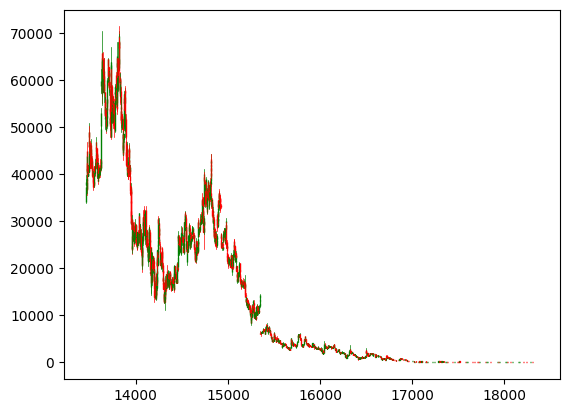

In [ ]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

data = pd.read_csv("/content/drive/MyDrive/master thesis/stk.csv")
# Plot candlestick chart with moving averages and RSI
ohlc = data[['Date', 'Open', 'High', 'Low', 'Adj Close']]
ohlc.set_index('Date', inplace=True)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])
ohlc.index = pd.to_datetime(ohlc.index)

# Prepare data for candlestick chart
quotes = data[['Date', 'Open', 'High', 'Low', 'Adj Close']]
quotes['Date'] = pd.to_datetime(quotes['Date'])
quotes['Date'] = quotes['Date'].apply(lambda x: mdates.date2num(x))

# Create the candlestick chart
fig, ax = plt.subplots()
candlestick_ohlc(ax, quotes.values, width=0.6, colorup='g', colordown='r')
plt.show()